In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
os.chdir("/mnt/c/Users/diego/OneDrive/Documentos/Data science projects/nlp 2/petsentiment_analysis")


In [7]:
data_process = pd.read_csv("data/raw/balanced_data.csv")


In [8]:
data_process.head(16)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,True
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,True
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,True
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,True
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,True
5,1.0,Lasted an hour,I am very disappointed. I bought the toy becau...,B0B4XWDTXW,B0B4XJGKD5,AFNOMLOH2H3LMA5WI5H3IYMCXNWA,2023-01-14 00:46:34.317000+00:00,0,True
6,1.0,Leather very thin.,Very flimsy material. Leather is VERY thin. My...,B09Q63Q991,B0993FL6GP,AE5W6JXBIVSYTCN7FU3EL6KYQUJA,2023-07-22 14:30:15.851000+00:00,0,True
7,1.0,Easily destroyed by dog,Dog chewed handle off in 20 min! What a waste...,B000PU34TO,B08KX8358R,AECDWA7OUKTCUYDVO2FM5QHUZRCA,2023-01-12 18:25:41.444000+00:00,0,True
8,1.0,My puppy tore this up in 3 hours!!,My 6 lb puppy tore up her ball in 3 hours. I w...,B07P5PRRY5,B0B8BM4GS6,AHDP3CS3VPUTTZHEKWPEZYLSNDRA,2023-03-14 21:18:46.608000+00:00,0,True
9,1.0,Fabric too stretchy & thin,"It was the perfect size, but the arm holes are...",B0B1TXD73K,B0B1TVQQ34,AEFVDQB4I3ZEWITRXSU5EOZH2TKQ,2023-01-28 01:56:17.027000+00:00,0,True


In [9]:
data_process["text"].values[15]

'Won’t even let my dog play with these- the smell of toxins is so overwhelming. Why would anyone make this for an animal??'

In [4]:
data_process = data_process.dropna()
data_process = data_process.reset_index(drop=True)

In [5]:
data_process["verified_purchase"] = data_process["verified_purchase"].map({True:1,False:0})

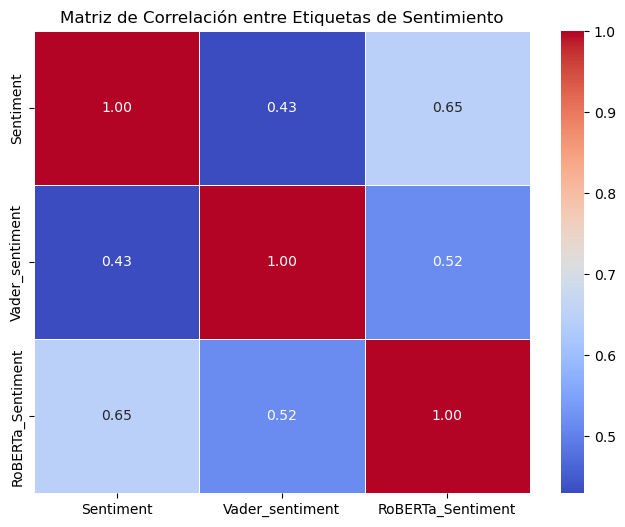

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar solo las columnas de sentimiento
sentiment_cols = ["Sentiment", "Vader_sentiment", "RoBERTa_Sentiment"]

# Convertir a valores numéricos si es necesario
data_process[sentiment_cols] = data_process[sentiment_cols].apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
correlation_matrix = data_process[sentiment_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Etiquetas de Sentimiento")
plt.show()


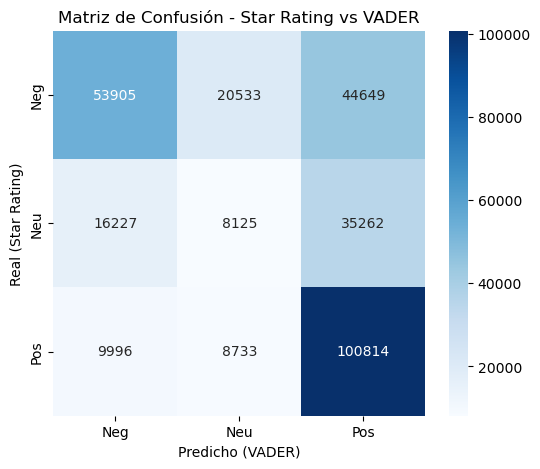

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Crear la matriz de confusión
conf_matrix = confusion_matrix(data_process["Sentiment"], data_process["Vader_sentiment"])

# Visualizarla con Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=["Neg", "Neu", "Pos"], yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicho (VADER)")
plt.ylabel("Real (Star Rating)")
plt.title("Matriz de Confusión - Star Rating vs VADER")
plt.show()

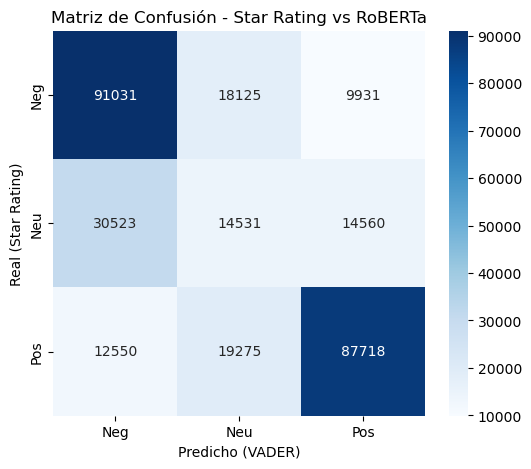

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Crear la matriz de confusión
conf_matrix = confusion_matrix(data_process["Sentiment"], data_process["RoBERTa_Sentiment"])

# Visualizarla con Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=["Neg", "Neu", "Pos"], yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicho (VADER)")
plt.ylabel("Real (Star Rating)")
plt.title("Matriz de Confusión - Star Rating vs RoBERTa")
plt.show()

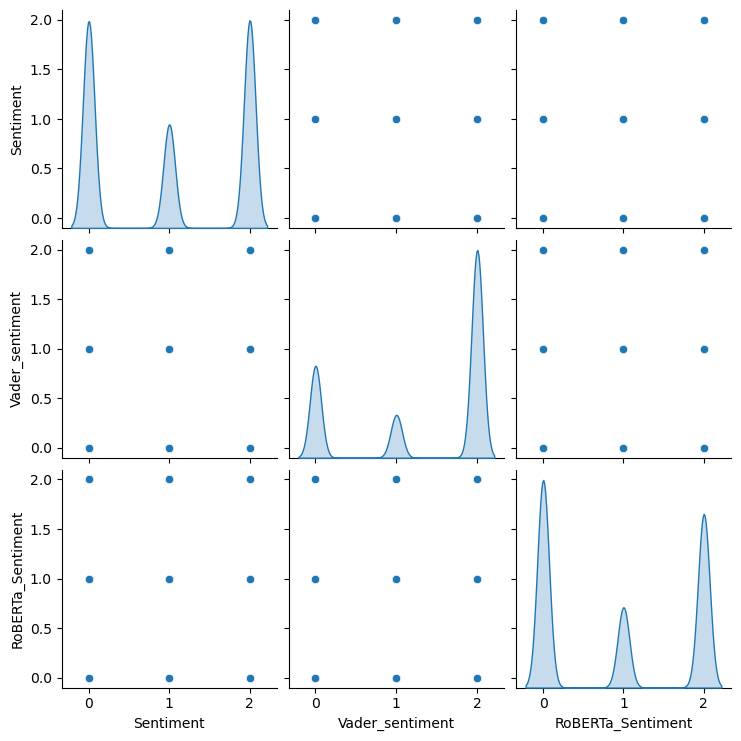

In [9]:
sns.pairplot(data_process[sentiment_cols], diag_kind="kde")
plt.show()


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables predictoras y target
features = ['helpful_vote', 'word_count', 'subjectivity', 'polarity']
target = "Sentiment"  # Puedes probar con VADER_sentiment o RoBERTa_sentiment también


/tmp/ipykernel_2250/64685634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_process[target], y=data_process[feature], palette="coolwarm")
/tmp/ipykernel_2250/64685634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_process[target], y=data_process[feature], palette="coolwarm")
/tmp/ipykernel_2250/64685634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_process[target], y=data_process[feature], palette="coolwarm")
/tmp/ipykernel_2250/64685634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is 

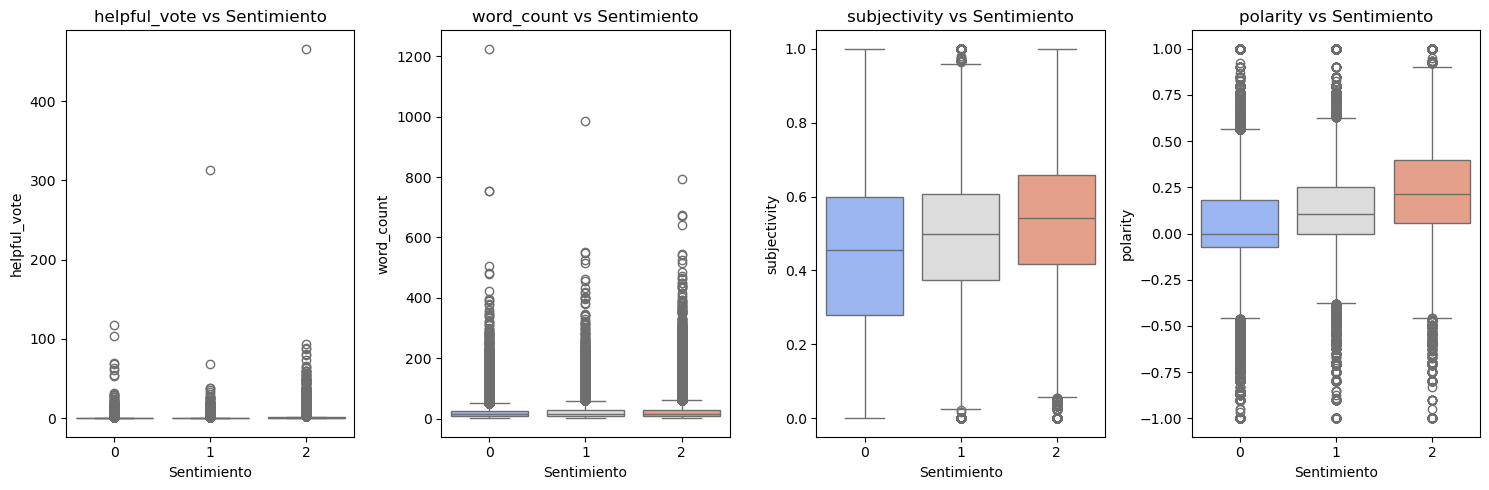

In [11]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=data_process[target], y=data_process[feature], palette="coolwarm")
    plt.xlabel("Sentimiento")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Sentimiento")

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(data_process[features], data_process[target], test_size=0.2, random_state=42, stratify=data_process[target])

# Escalar los datos (opcional, pero recomendable para regresión)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo de regresión logística
log_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = log_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.546429948532247
              precision    recall  f1-score   support

           0       0.54      0.69      0.60     23817
           1       0.00      0.00      0.00     11923
           2       0.55      0.68      0.61     23909

    accuracy                           0.55     59649
   macro avg       0.36      0.46      0.40     59649
weighted avg       0.44      0.55      0.49     59649



/home/diegopy/miniconda3/envs/faster_pandas/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/diegopy/miniconda3/envs/faster_pandas/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diegopy/miniconda3/envs/faster_pandas/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

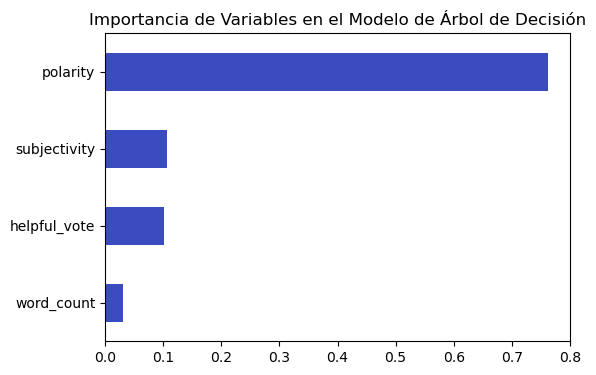

In [13]:
from sklearn.tree import DecisionTreeClassifier
importances = []

# Entrenar Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Obtener importancia de las características
importances = pd.Series(tree_model.feature_importances_, index=features)
importances.sort_values().plot(kind="barh", colormap="coolwarm", figsize=(6,4))
plt.title("Importancia de Variables en el Modelo de Árbol de Decisión")
plt.show()


In [14]:
data_process.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,processed_reviews,...,Vader_sentiment,Sentiment_match_vader,RoBERTa_Sentiment,Sentiment_match_roberta,cleaned_review,word_count,subjectivity,sentiment_ratio,polarity,product_mentions
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,1,Opened this and gave to my two medium size dog...,...,0,True,0,True,opened gave two medium size dogs pulling many ...,14.0,0.250000,-0.023,0.150000,3.0
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,1,My dog chewed through this harness on about 3 ...,...,2,False,0,True,dog chewed harness minutes waiting groomer ive...,30.0,0.333333,0.053,0.300000,4.0
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,1,It didn’t work at all for my dog he is 30 lbs ...,...,1,False,0,True,didnt work dog lbs even gave double dose absol...,12.0,0.450000,0.000,0.100000,2.0
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,1,Cats didn’t use it😞,...,0,True,0,True,cats didnt use,3.0,0.000000,0.000,0.000000,1.0
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,1,Felt didn’t last. Squeaker stopped working aft...,...,0,True,0,True,felt didnt last squeaker stopped working secon...,10.0,0.222222,-0.112,-0.133333,1.0


In [15]:
import pandas as pd

# Asegúrate de tener las columnas necesarias: 'parent_asin' y 'Sentiment'
# Supongamos que 'data_process' es el DataFrame que contiene la información de las reseñas
# La columna 'Sentiment' contiene las etiquetas de sentimiento (por ejemplo, 0=negativo, 1=neutro, 2=positivo)

# Agrupar por 'product_id' y calcular la desviación estándar del sentimiento
product_sentiment_std = data_process.groupby('parent_asin')['polarity'].std().reset_index()

# Renombrar la columna para mayor claridad
product_sentiment_std = product_sentiment_std.rename(columns={'polarity': 'Sentiment_STD'})

# Visualizar los primeros productos con la desviación estándar más alta (polarización más alta)
top_polarized_products = product_sentiment_std.sort_values(by='Sentiment_STD', ascending=False)
print(top_polarized_products.head(10))
print(top_polarized_products.nunique())


      parent_asin  Sentiment_STD
15150  B07ZH9GKTY       1.272792
57593  B0BX2F3XH4       1.225652
14098  B07WHW41BS       1.202082
14781  B07YHN8R8T       1.131371
35740  B09V8QD7CD       1.131371
51402  B0BMFQRN75       1.131371
12000  B07NN5H295       1.117229
6954   B06XFM77HM       1.111168
4299   B00WUH42KU       1.096016
1310   B002GELWEQ       1.070762
parent_asin      63815
Sentiment_STD    28586
dtype: int64


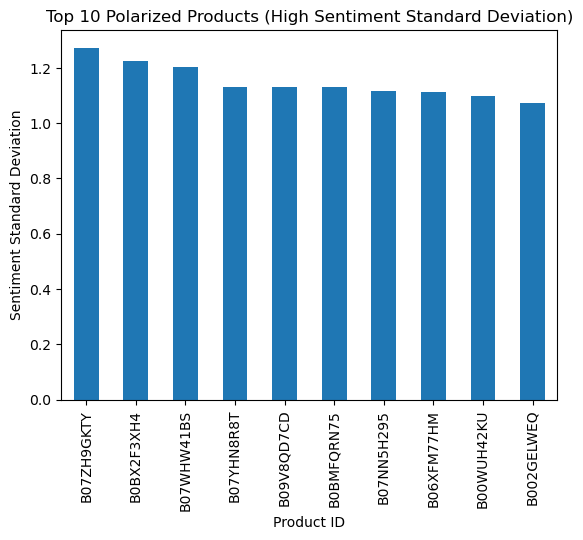

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los productos con mayor desviación estándar
top_polarized_products.head(10).plot(kind='bar', x='parent_asin', y='Sentiment_STD', legend=False)
plt.xlabel('Product ID')
plt.ylabel('Sentiment Standard Deviation')
plt.title('Top 10 Polarized Products (High Sentiment Standard Deviation)')
plt.show()


In [17]:
# Estadísticas descriptivas de la columna Sentiment_STD
sentiment_std_stats = top_polarized_products['Sentiment_STD'].describe()
print(sentiment_std_stats)


count    33344.000000
mean         0.226008
std          0.132268
min          0.000000
25%          0.135529
50%          0.214489
75%          0.294932
max          1.272792
Name: Sentiment_STD, dtype: float64


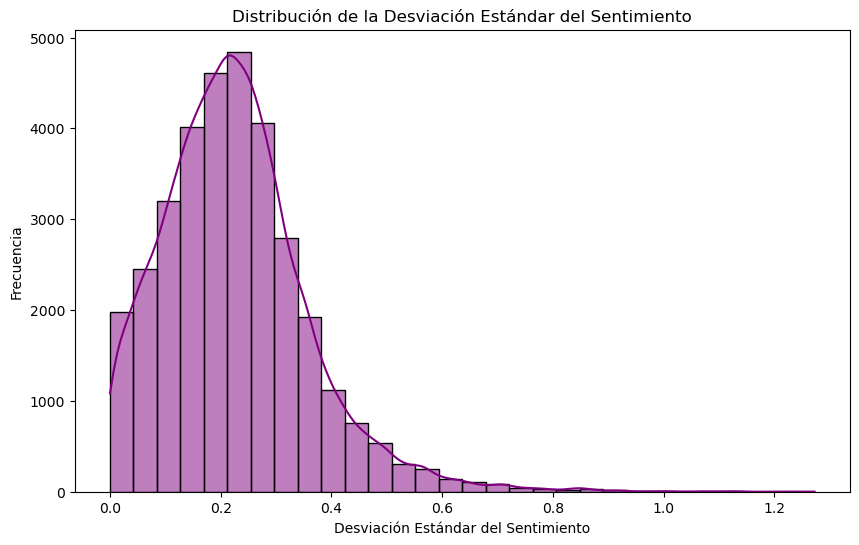

In [18]:
# Graficar la distribución de la desviación estándar
plt.figure(figsize=(10,6))
sns.histplot(top_polarized_products['Sentiment_STD'], bins=30, kde=True, color='purple')
plt.title('Distribución de la Desviación Estándar del Sentimiento')
plt.xlabel('Desviación Estándar del Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [19]:
# Establecer un umbral de desviación estándar alta
threshold = 1.0  # Ejemplo: productos con desviación estándar mayor que 1.0

# Filtrar los productos que tienen una desviación estándar mayor que el umbral
high_polarized_products = top_polarized_products[top_polarized_products['Sentiment_STD'] > threshold]

# Ver los primeros productos con alta polarización
print(high_polarized_products.head(10))


      parent_asin  Sentiment_STD
15150  B07ZH9GKTY       1.272792
57593  B0BX2F3XH4       1.225652
14098  B07WHW41BS       1.202082
14781  B07YHN8R8T       1.131371
35740  B09V8QD7CD       1.131371
51402  B0BMFQRN75       1.131371
12000  B07NN5H295       1.117229
6954   B06XFM77HM       1.111168
4299   B00WUH42KU       1.096016
1310   B002GELWEQ       1.070762


In [20]:
# Crear categorías de desviación estándar
bins = [0, 0.5, 1, 1.5, 2, 3, top_polarized_products['Sentiment_STD'].max()]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-3', '3+']

# Asegúrate de que los bins estén en orden ascendente
bins.sort()

# Crear una nueva columna para las categorías
top_polarized_products['Sentiment_STD_Category'] = pd.cut(top_polarized_products['Sentiment_STD'], bins=bins, labels=labels)

# Ver los productos en cada rango de desviación estándar
category_summary = top_polarized_products.groupby('Sentiment_STD_Category').size()
print(category_summary)



Sentiment_STD_Category
0-0.5    31902
0.5-1     1111
1-1.5       17
1.5-2        0
2-3          0
3+           0
dtype: int64


/tmp/ipykernel_2250/3046400793.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary = top_polarized_products.groupby('Sentiment_STD_Category').size()


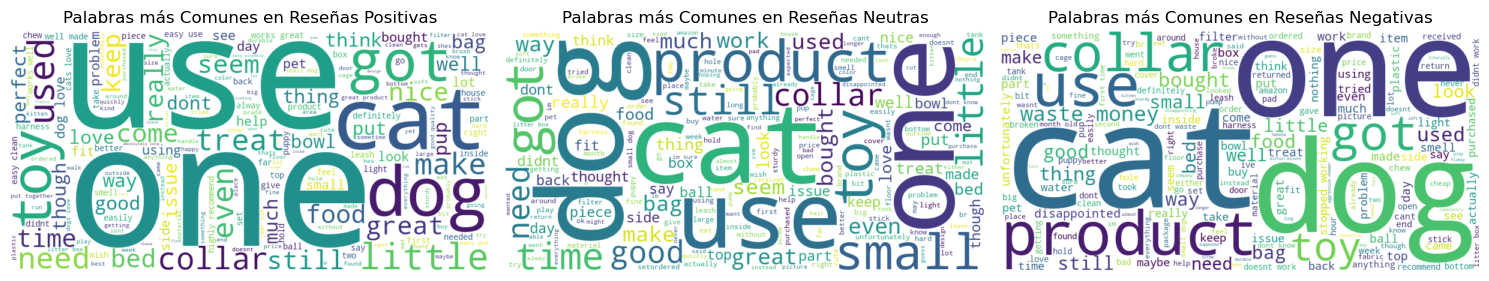

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dividir las reseñas en positivas, neutras y negativas
positive_reviews = data_process[data_process['Sentiment'] == 2]['cleaned_review']
neutral_reviews = data_process[data_process['Sentiment'] == 1]['cleaned_review']
negative_reviews = data_process[data_process['Sentiment'] == 0]['cleaned_review']

# Unir todas las reseñas en una sola cadena de texto
positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

# Generar las nubes de palabras para reseñas positivas, neutras y negativas
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Visualizar las nubes de palabras
plt.figure(figsize=(15, 8))

# Nube de palabras positivas
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más Comunes en Reseñas Positivas')

# Nube de palabras neutras
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más Comunes en Reseñas Neutras')

# Nube de palabras negativas
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más Comunes en Reseñas Negativas')

plt.tight_layout()
plt.show()


/tmp/ipykernel_2250/762346195.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='helpful_vote', data=data_process, palette='Set2')


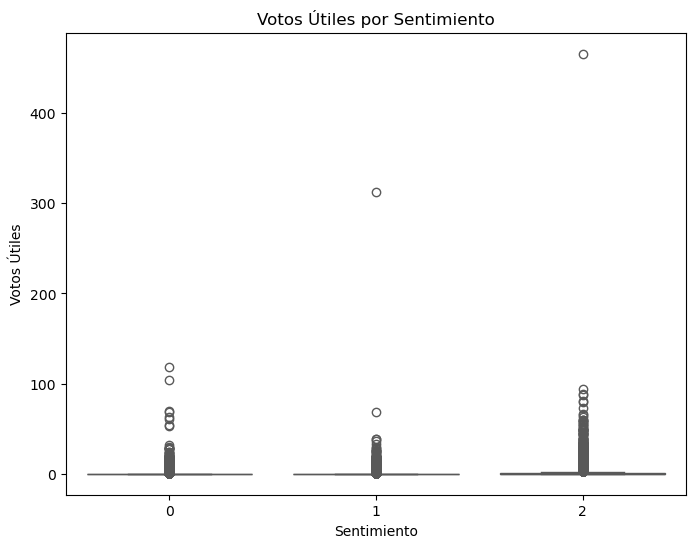

/tmp/ipykernel_2250/762346195.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='helpful_vote', data=data_process, palette='Set3')


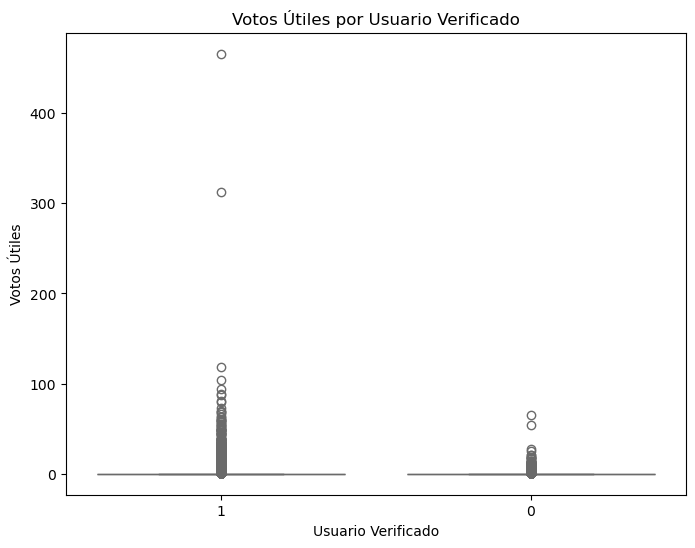

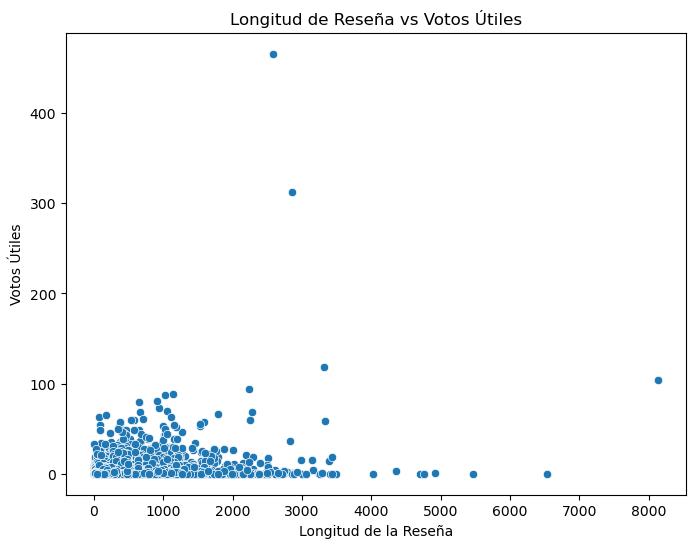

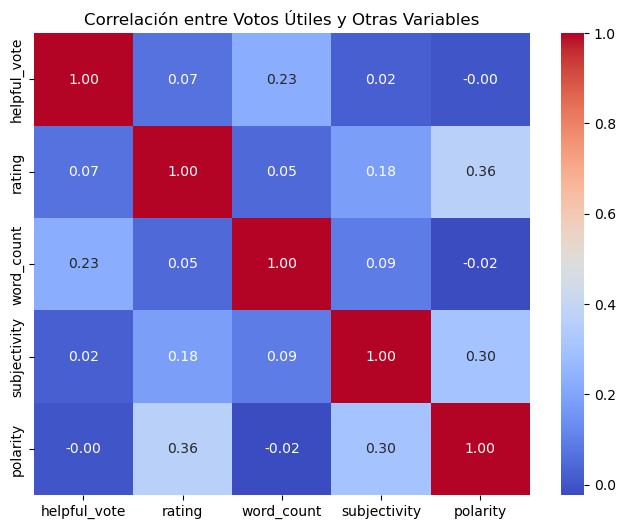

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado data_process con las columnas relevantes

# Asegúrate de que las columnas estén del tipo correcto
data_process['helpful_vote'] = data_process['helpful_vote'].astype(int)
data_process['Sentiment'] = data_process['Sentiment'].astype(int)
data_process['verified_purchase'] = data_process['verified_purchase'].astype(str)  # o como categoría

# 1. **Correlación entre votos útiles y sentimiento:**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='helpful_vote', data=data_process, palette='Set2')
plt.title('Votos Útiles por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Votos Útiles')
plt.show()

# 2. **Votos útiles en usuarios verificados vs no verificados:**
plt.figure(figsize=(8, 6))
sns.boxplot(x='verified_purchase', y='helpful_vote', data=data_process, palette='Set3')
plt.title('Votos Útiles por Usuario Verificado')
plt.xlabel('Usuario Verificado')
plt.ylabel('Votos Útiles')
plt.show()

# 3. **Relación entre longitud de la reseña y votos útiles:**
# Calcular la longitud de las reseñas
data_process['word_count'] = data_process['cleaned_review'].apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='word_count', y='helpful_vote', data=data_process)
plt.title('Longitud de Reseña vs Votos Útiles')
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Votos Útiles')
plt.show()

# 4. **Análisis de correlación entre los votos útiles y otras variables numéricas**
correlation = data_process[['helpful_vote', 'rating', 'word_count', 'subjectivity', 'polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Votos Útiles y Otras Variables')
plt.show()


/tmp/ipykernel_2250/2874023216.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='subjectivity', data=data_process, palette='Set2')


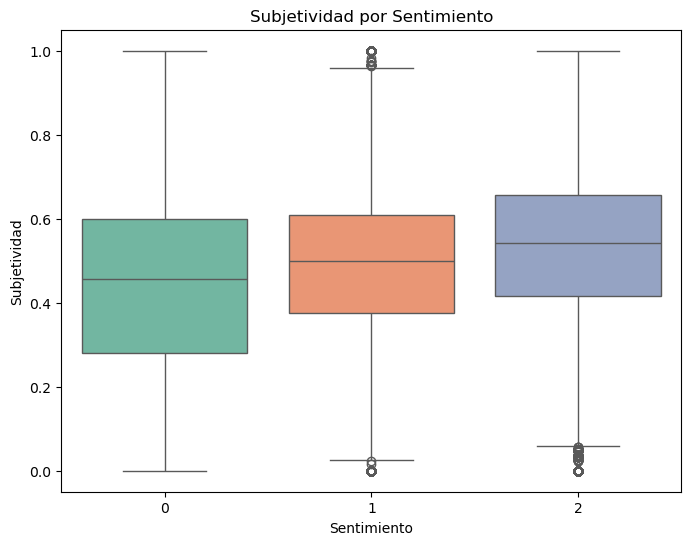

/tmp/ipykernel_2250/2874023216.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='word_count', data=data_process, palette='Set3')


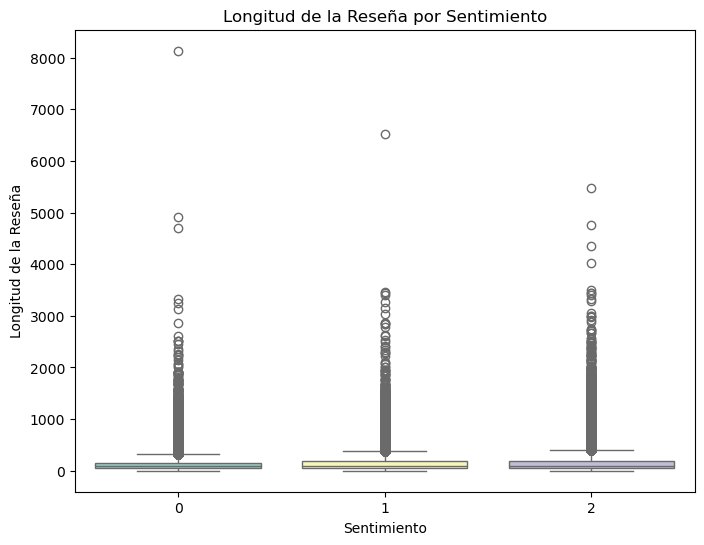

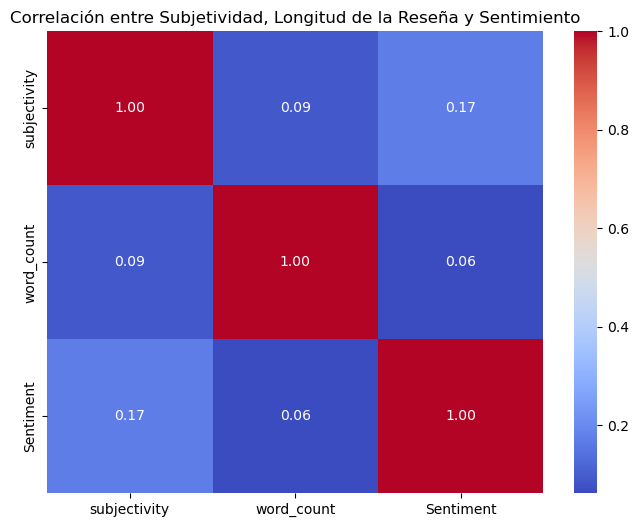

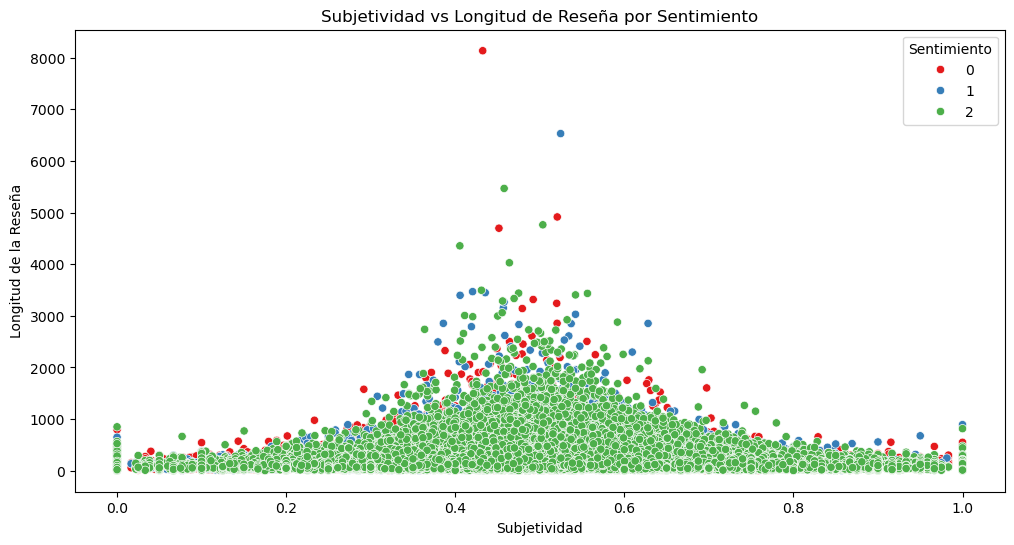

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado data_process con las columnas relevantes
# y las columnas 'sentiment', 'subjectivity', 'word_count' ya están calculadas

# Asegúrate de que las columnas estén del tipo correcto
data_process['Sentiment'] = data_process['Sentiment'].astype(int)
data_process['subjectivity'] = data_process['subjectivity'].astype(float)
data_process['word_count'] = data_process['cleaned_review'].apply(len)

# 1. **Subjetividad y sentimiento:**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='subjectivity', data=data_process, palette='Set2')
plt.title('Subjetividad por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Subjetividad')
plt.show()

# 2. **Longitud de la reseña y sentimiento:**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='word_count', data=data_process, palette='Set3')
plt.title('Longitud de la Reseña por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud de la Reseña')
plt.show()

# 3. **Análisis de correlación entre subjetividad, longitud y sentimiento:**
correlation = data_process[['subjectivity', 'word_count', 'Sentiment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Subjetividad, Longitud de la Reseña y Sentimiento')
plt.show()

# 4. **Distribución de la subjetividad y la longitud de la reseña por sentimiento:**
# Para analizar cómo la longitud y la subjetividad se distribuyen según las categorías de sentimiento
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subjectivity', y='word_count', hue='Sentiment', data=data_process, palette='Set1')
plt.title('Subjetividad vs Longitud de Reseña por Sentimiento')
plt.xlabel('Subjetividad')
plt.ylabel('Longitud de la Reseña')
plt.legend(title='Sentimiento')
plt.show()


In [24]:
data_process.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'processed_reviews',
       'Sentiment', 'Vader_sentiment', 'Sentiment_match_vader',
       'RoBERTa_Sentiment', 'Sentiment_match_roberta', 'cleaned_review',
       'word_count', 'subjectivity', 'sentiment_ratio', 'polarity',
       'product_mentions'],
      dtype='object')

In [25]:
metadata = pd.read_csv("data/processed/output.csv")

In [26]:
# Unir los DataFrames usando la columna 'parent_asin'
df_combined = pd.merge(data_process, metadata, how='left', left_on='parent_asin', right_on='parent_asin')

# Verificar el DataFrame combinado
print(df_combined.head())

   rating               title_x  \
0     1.0           Not durable   
1     1.0   Warranty is a joke.   
2     1.0           Didn’t work   
3     1.0              Function   
4     1.0  Only squeezed twice.   

                                                text        asin parent_asin  \
0  Opened this and gave to my two medium size dog...  B0002ASNMU  B0BM21F82G   
1  My dog chewed through this harness on about 3 ...  B00A7EXS5I  B07BRJF2SW   
2  It didn’t work at all for my dog he is 30 lbs ...  B08MVBDV5V  B0C1VH3V99   
3                                Cats didn’t use it😞  B093F6CV44  B094NHVKFN   
4  Felt didn’t last. Squeaker stopped working aft...  B07P5PRRY5  B0B8BM4GS6   

                        user_id                         timestamp  \
0  AFZ7XMWG6DXKI63EPOBPK7W7QIEQ  2023-02-22 02:35:57.945000+00:00   
1  AFUORUIMJALPSG3VUWSXY2FMSDQA  2023-05-13 19:22:01.561000+00:00   
2  AHXF542MTZNBO3VN67NF5VXLZ45Q  2023-07-05 04:08:21.669000+00:00   
3  AH42DXAG6RD24MH5KACH2Q3SQ73A 

In [27]:
df_combined.head()

,rating,title_x,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,processed_reviews,...,sentiment_ratio,polarity,product_mentions,title_y,average_rating,rating_number,description,price,store,categories
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,1,Opened this and gave to my two medium size dog...,...,-0.023,0.150000,3.0,Nylabone FlexiChew Moderate Dog Toys Triple Pa...,4.4,6420,"[""This value pack of chew toys for small dogs ...",11.64,Nylabone,"['Pet Supplies', 'Dogs', 'Treats', 'Cookies, B..."
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,1,My dog chewed through this harness on about 3 ...,...,0.053,0.300000,4.0,2 Hounds Design Freedom No Pull Dog Harness | ...,4.4,11491,[],41.96,2 Hounds Design,"['Pet Supplies', 'Dogs', 'Collars, Harnesses &..."
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,1,It didn’t work at all for my dog he is 30 lbs ...,...,0.000,0.100000,2.0,Pet Naturals BusyButter Easy Squeeze Calming P...,3.9,30438,[],23.25,Pet Naturals,"['Pet Supplies', 'Dogs', 'Treats', 'Cookies, B..."
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,1,Cats didn’t use it😞,...,0.000,0.000000,1.0,"MS!MAKE SURE Cat Scratching Post, Three Modes ...",3.7,308,[],50.99,MS!MAKE SURE,"['Pet Supplies', 'Cats', 'Beds & Furniture', '..."
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,1,Felt didn’t last. Squeaker stopped working aft...,...,-0.112,-0.133333,1.0,Outward Hound Squeakin' Holey Moley Dog Ball S...,4.2,27919,[],6.5,Outward Hound,"['Pet Supplies', 'Dogs', 'Toys', 'Squeak Toys']"


In [28]:
df_combined.columns

Index(['rating', 'title_x', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'processed_reviews',
       'Sentiment', 'Vader_sentiment', 'Sentiment_match_vader',
       'RoBERTa_Sentiment', 'Sentiment_match_roberta', 'cleaned_review',
       'word_count', 'subjectivity', 'sentiment_ratio', 'polarity',
       'product_mentions', 'title_y', 'average_rating', 'rating_number',
       'description', 'price', 'store', 'categories'],
      dtype='object')

In [29]:
# Aseguramos que description y categories son listas de palabras, si no, las convertimos en listas
df_combined['description'] = df_combined['description'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_combined['categories'] = df_combined['categories'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 1. **Filtrar productos con reseñas positivas, neutras y negativas**
positive_reviews = df_combined[df_combined['Sentiment'] == 2]  # Sentimiento positivo (2)
neutral_reviews = df_combined[df_combined['Sentiment'] == 1]  # Sentimiento neutro (1)
negative_reviews = df_combined[df_combined['Sentiment'] == 0]  # Sentimiento negativo (0)

# 2. **Recomendación basada en sentimiento**
recommended_products_positive = positive_reviews[['parent_asin', 'title_y']].drop_duplicates()
recommended_products_neutral = neutral_reviews[['parent_asin', 'title_y']].drop_duplicates()
avoided_products_negative = negative_reviews[['parent_asin', 'title_y']].drop_duplicates()

# 3. **Sistema de recomendación basado en contenido con NearestNeighbors**
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_combined['cleaned_review'])

# Modelo de vecinos más cercanos basado en similitud de coseno
nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
nn_model.fit(tfidf_matrix)

# Producto específico para recomendar similares (puedes cambiar el índice)
product_idx = 10  

# Encontrar productos más similares
distances, indices = nn_model.kneighbors(tfidf_matrix[product_idx])

# Obtener los productos recomendados excluyendo el mismo producto
recommended_products = df_combined.iloc[indices[0][1:]][['parent_asin', 'title_y']]

# 4. **Combinar recomendaciones evitando productos con reseñas negativas**
final_recommendations = pd.concat([recommended_products_positive, recommended_products_neutral, recommended_products], ignore_index=True)
final_recommendations = final_recommendations.drop_duplicates(subset='parent_asin')

# Excluir productos con reseñas negativas
final_recommendations = final_recommendations[~final_recommendations['parent_asin'].isin(avoided_products_negative['parent_asin'])]

# 5. **Mostrar recomendaciones finales**
print("Productos recomendados:")
print(final_recommendations[['parent_asin', 'title_y']])


Productos recomendados:
      parent_asin                                            title_y
8      B07D1TJ8MW  Prestige Cat Trees 130012-Neutral Main Coon Ca...
9      B096N63MMT  Texas Pet Company Chicken On A Stick Crunchy &...
16     B08617LWN7  DGZZI Air Distributor Splitte 2PCS 2-Way Stain...
17     B001VIYAH4  8 In 1 Pet Products Seop84002 Ecotrition Small...
21     B0C2RHVZJ4  Halo Holistic Dog Food, Complete Digestive Hea...
...           ...                                                ...
64914  B09W2CBJ7K  Heart Pain Soft Flannel Fleece Blanket Dog Paw...
64916  B09Y8K91QH  Console Dog car seat pet Booster seat on Cente...
64919  B0778YBVWT  Loving Pets Pure Buffalo Lung Steaks Dog Treat...
64921  B09WQC4PXP  softhug Waterproof Dog Blanket for Dogs Cats, ...
64925  B09LTGMCKS                A Fortunate Dog 32 oz Mixing Bottle

[26023 rows x 2 columns]


In [31]:
df_combined.head()


,rating,title_x,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,processed_reviews,...,sentiment_ratio,polarity,product_mentions,title_y,average_rating,rating_number,description,price,store,categories
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,1,Opened this and gave to my two medium size dog...,...,-0.023,0.150000,3.0,Nylabone FlexiChew Moderate Dog Toys Triple Pa...,4.4,6420,This value pack of chew toys for small dogs pr...,11.64,Nylabone,"Pet Supplies Dogs Treats Cookies, Biscuits & S..."
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,1,My dog chewed through this harness on about 3 ...,...,0.053,0.300000,4.0,2 Hounds Design Freedom No Pull Dog Harness | ...,4.4,11491,,41.96,2 Hounds Design,"Pet Supplies Dogs Collars, Harnesses & Leashes..."
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,1,It didn’t work at all for my dog he is 30 lbs ...,...,0.000,0.100000,2.0,Pet Naturals BusyButter Easy Squeeze Calming P...,3.9,30438,,23.25,Pet Naturals,"Pet Supplies Dogs Treats Cookies, Biscuits & S..."
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,1,Cats didn’t use it😞,...,0.000,0.000000,1.0,"MS!MAKE SURE Cat Scratching Post, Three Modes ...",3.7,308,,50.99,MS!MAKE SURE,Pet Supplies Cats Beds & Furniture Scratching ...
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,1,Felt didn’t last. Squeaker stopped working aft...,...,-0.112,-0.133333,1.0,Outward Hound Squeakin' Holey Moley Dog Ball S...,4.2,27919,,6.5,Outward Hound,Pet Supplies Dogs Toys Squeak Toys


In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from annoy import AnnoyIndex

# ========================== 1️⃣ FILTRADO POR SENTIMIENTOS ========================== #
# Filtrar productos según la clasificación de sentimiento
products_to_avoid = df_combined[df_combined['Sentiment'] == 0]['parent_asin'].value_counts()
products_to_avoid = set(products_to_avoid[products_to_avoid > 5].index)  # Excluir productos con más de 5 reseñas negativas

# ========================== 2️⃣ RECOMENDACIÓN BASADA EN CONTENIDO ========================== #
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = vectorizer.fit_transform(df_combined['cleaned_review']).astype(np.float32)

# ANN para búsqueda eficiente
dim = tfidf_matrix.shape[1]
annoy_index = AnnoyIndex(dim, 'angular')

# Indexar solo productos únicos
unique_products = df_combined[['parent_asin', 'cleaned_review']].drop_duplicates().reset_index(drop=True)

for i, row in unique_products.iterrows():
    annoy_index.add_item(i, tfidf_matrix[i].toarray()[0])

annoy_index.build(10)

# Función para recomendar productos similares
def recommend_similar_products(product_id, top_n=5):
    try:
        product_idx = unique_products.index[unique_products['parent_asin'] == product_id][0]
        similar_indices = annoy_index.get_nns_by_item(product_idx, top_n + 1)[1:]
        return unique_products.iloc[similar_indices][['parent_asin']]
    except IndexError:
        return pd.DataFrame(columns=['parent_asin'])

# ========================== 3️⃣ FILTRADO COLABORATIVO CON SVD ========================== #
df_combined['customer_id_num'] = df_combined['user_id'].astype('category').cat.codes
df_combined['parent_asin_num'] = df_combined['parent_asin'].astype('category').cat.codes

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_combined[['customer_id_num', 'parent_asin_num', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)
model_svd = SVD()
model_svd.fit(trainset)

# Función para recomendar productos a un usuario
def recommend_personalized_products(user_id, top_n=5):
    user_code = df_combined[df_combined['user_id'] == user_id]['customer_id_num'].unique()
    if len(user_code) == 0:
        return []  # Usuario no encontrado
    user_code = user_code[0]

    all_products = df_combined['parent_asin_num'].unique()
    user_products = df_combined[df_combined['customer_id_num'] == user_code]['parent_asin_num'].unique()
    products_to_predict = [p for p in all_products if p not in user_products]

    predictions = [model_svd.predict(user_code, p) for p in products_to_predict]
    predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    recommended_ids = [df_combined[df_combined['parent_asin_num'] == pred.iid]['parent_asin'].iloc[0] for pred in predictions[:top_n]]
    return recommended_ids

# ========================== 4️⃣ COMBINAR RECOMENDACIONES ========================== #
def hybrid_recommendations(user_id, product_id, top_n=5):
    content_recommendations = recommend_similar_products(product_id, top_n)
    collaborative_recommendations = recommend_personalized_products(user_id, top_n)

    final_recommendations = pd.merge(
        content_recommendations, 
        df_combined[df_combined['parent_asin'].isin(collaborative_recommendations)][['parent_asin']],
        on='parent_asin', how='outer'
    ).drop_duplicates()

    return final_recommendations[~final_recommendations['parent_asin'].isin(products_to_avoid)].head(top_n)

# ========================== 5️⃣ PRUEBA DEL SISTEMA ========================== #
user_id_test = 'AFUORUIMJALPSG3VUWSXY2FMSDQA'
product_id_test = 'B0C1VH3V99'

print("🔹 Recomendaciones híbridas:")
print(hybrid_recommendations(user_id_test, product_id_test, top_n=5))


🔹 Recomendaciones híbridas:
   parent_asin
0   B089WLSFBZ
1   B09L81Q7DS
3   B09Q6DRG8D
4   B09TT2N9FG
37  B0BFDM69NJ


In [57]:
# Filtrar por el parent_asin para ver la fila completa
asin_to_search = ['B081S8W2PR']  # Los parent_asin que deseas buscar
filtered_data = df_combined[df_combined['parent_asin'].isin(asin_to_search)]

# Mostrar las filas completas con todos los atributos
filtered_data["title_y"].values[0]

'Wild Alaskan Salmon Oil for Dogs & Cats - Pure Fish Omega 3 6 9 Liquid EPA DHA Fatty Acids - Skin & Coat Supplement - Supports Joint Function, Brain, Eye, Immune & Heart Health - Made in USA 32 oz'

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from annoy import AnnoyIndex

# ========================== 1️⃣ FILTRADO POR SENTIMIENTOS ========================== #
# Filtrar productos según la clasificación de sentimiento
products_to_avoid = df_combined[df_combined['Sentiment'] == 0]['parent_asin'].value_counts()
products_to_avoid = set(products_to_avoid[products_to_avoid > 5].index)  # Excluir productos con más de 5 reseñas negativas

# ========================== 2️⃣ RECOMENDACIÓN BASADA EN EL TÍTULO DEL PRODUCTO ========================== #
# Utilizando el título del producto (title_y) en lugar de product_title
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = vectorizer.fit_transform(df_combined['title_y']).astype(np.float32)

# ANN para búsqueda eficiente
dim = tfidf_matrix.shape[1]
annoy_index = AnnoyIndex(dim, 'angular')

# Indexar solo productos únicos
unique_products = df_combined[['parent_asin', 'title_y']].drop_duplicates().reset_index(drop=True)

for i, row in unique_products.iterrows():
    annoy_index.add_item(i, tfidf_matrix[i].toarray()[0])

annoy_index.build(10)

# Función para recomendar productos similares basados en el título
def recommend_similar_products(product_id, top_n=5):
    try:
        product_idx = unique_products.index[unique_products['parent_asin'] == product_id][0]
        similar_indices = annoy_index.get_nns_by_item(product_idx, top_n + 1)[1:]
        return unique_products.iloc[similar_indices][['parent_asin']]
    except IndexError:
        return pd.DataFrame(columns=['parent_asin'])

# ========================== 3️⃣ FILTRADO COLABORATIVO CON SVD ========================== #
df_combined['customer_id_num'] = df_combined['user_id'].astype('category').cat.codes
df_combined['parent_asin_num'] = df_combined['parent_asin'].astype('category').cat.codes

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_combined[['customer_id_num', 'parent_asin_num', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)
model_svd = SVD()
model_svd.fit(trainset)

# Función para recomendar productos a un usuario
def recommend_personalized_products(user_id, top_n=5):
    user_code = df_combined[df_combined['user_id'] == user_id]['customer_id_num'].unique()
    if len(user_code) == 0:
        return []  # Usuario no encontrado
    user_code = user_code[0]

    all_products = df_combined['parent_asin_num'].unique()
    user_products = df_combined[df_combined['customer_id_num'] == user_code]['parent_asin_num'].unique()
    products_to_predict = [p for p in all_products if p not in user_products]

    predictions = [model_svd.predict(user_code, p) for p in products_to_predict]
    predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    recommended_ids = [df_combined[df_combined['parent_asin_num'] == pred.iid]['parent_asin'].iloc[0] for pred in predictions[:top_n]]
    return recommended_ids

# ========================== 4️⃣ COMBINAR RECOMENDACIONES ========================== #
def hybrid_recommendations(user_id, product_id, top_n=5):
    content_recommendations = recommend_similar_products(product_id, top_n)
    collaborative_recommendations = recommend_personalized_products(user_id, top_n)

    final_recommendations = pd.merge(
        content_recommendations, 
        df_combined[df_combined['parent_asin'].isin(collaborative_recommendations)][['parent_asin']],
        on='parent_asin', how='outer'
    ).drop_duplicates()

    return final_recommendations[~final_recommendations['parent_asin'].isin(products_to_avoid)].head(top_n)

# ========================== 5️⃣ PRUEBA DEL SISTEMA ========================== #
user_id_test = 'AFUORUIMJALPSG3VUWSXY2FMSDQA'
product_id_test = 'B07BRJF2SW'

print("🔹 Recomendaciones híbridas:")
print(hybrid_recommendations(user_id_test, product_id_test, top_n=5))


🔹 Recomendaciones híbridas:
   parent_asin
0   B0725W9QBY
1   B091DKVKP4
2   B09TT2N9FG
35  B0B6HYFK5B
81  B0BCFXJ6T1


In [71]:
user_id_test = 'AFUORUIMJALPSG3VUWSXY2FMSDQA'
product_id_test = 'B07BRJF2SW'

print("🔹 Recomendaciones híbridas:")
print(hybrid_recommendations(user_id_test, product_id_test, top_n=5))

🔹 Recomendaciones híbridas:
   parent_asin
1   B09KTF98GX
2   B09MJ8YHT5
3   B09TT2N9FG
36  B0B6HYFK5B
82  B0BFDM69NJ


In [74]:
# Filtrar por el parent_asin para ver la fila completa
asin_to_search = ['B09MJ8YHT5']  # Los parent_asin que deseas buscar
filtered_data = df_combined[df_combined['parent_asin'].isin(asin_to_search)]

# Mostrar las filas completas con todos los atributos
filtered_data["title_y"].values[0]

'Bone Dry Paw & Patch Ceramic Pet Collection, Small Set, 4.25x2, Hunter Green, 2 Piece,5742'